<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/SVM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix            # matriz de confusión
from sklearn.metrics import classification_report       # evaluación  Accuracy/Precision/Recall/F1 Score
from sklearn.metrics import ConfusionMatrixDisplay      # matriz de confusión para mapa de calor

# Descarga de Datos

In [ ]:
# Cargar los datos desde el archivo CSV
# data = pd.read_csv('datos.csv')
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv', delimiter=';')

# Preprocesado de Datos

In [ ]:
#Preprocesado de datos ya que SVC requiere datos numéricos

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = data.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [ ]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = data.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

In [ ]:
data_processed

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,EQUIPO_qmsudmubli,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario
0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,0,0,0,0,1,0,0,0,1,0
1,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,6.0,2.0,...,0,0,0,0,1,0,0,0,1,0
2,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,...,0,0,0,1,0,0,0,1,0,0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,0,0,0,0,1,0,0,0,1,0
4,2.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,5.0,1.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,...,1,0,0,0,0,1,0,0,0,0
129,2.0,3.0,4.0,5.0,4.0,4.0,3.0,6.0,4.0,1.0,...,1,0,0,0,0,1,0,0,0,0
130,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1,0,0,0,0,1,0,0,0,0
131,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X = data_processed.drop('EQUIPO_qmsudmubli', axis=1)  # nombre de la columna objetivo, en este caso AREA
y = data_processed['EQUIPO_qmsudmubli']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creación del Modelo

> Bloque con sangría



In [ ]:
# Crear el modelo SVM
modelSVC = SVC(probability=True)

# Entrenar el modelo
history = modelSVC.fit(X_train, y_train)

## Predicciones y resultados

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelSVC.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9629629629629629


In [ ]:
# Resultados
resultados = modelSVC.predict(X_test)
resultados_maximos = []
for i in resultados:
  resultados_maximos.append(np.where(i==i.max()))
resultados_maximos= [int(tupla[0]) for tupla in resultados_maximos]

# Generación del informe de clasificación
print("\n", classification_report(y_test, resultados_maximos, zero_division=True))


               precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.00      0.00         1

    accuracy                           0.96        27
   macro avg       0.98      0.50      0.49        27
weighted avg       0.96      0.96      0.94        27



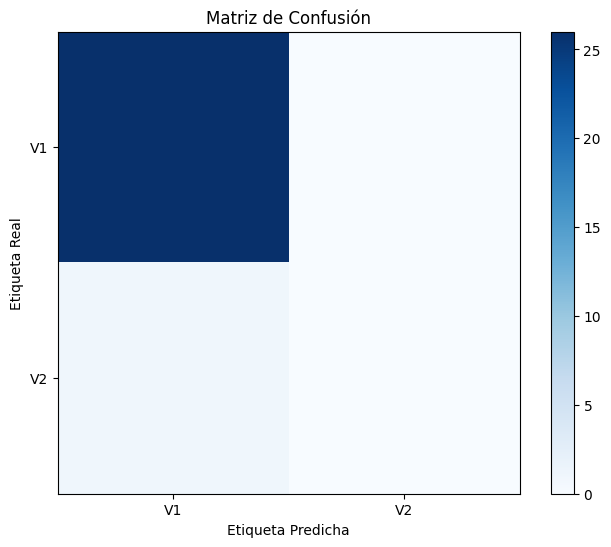

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
classes = ['V1', 'V2']  # Ajustar las etiquetas de clase según los datos
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


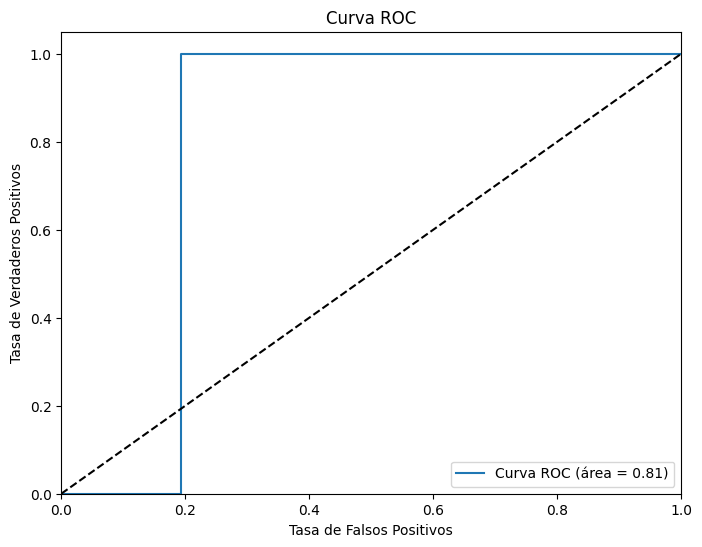

In [ ]:
# Obtener las puntuaciones de la función de decisión
y_scores = modelSVC.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Visualizar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()